In [72]:
%matplotlib inline
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.axes import Axes
#import HTSeq
import pandas as pd
import itertools
import os
import pandas as pd
from Bio import SeqIO
from Bio import SeqUtils

In [73]:
full_path ='/Users/ben/Documents/work_related/Canberra/RJ_lab_projects/Rust_genome_sequencing/PST79/analysis/PacBio_SCH1743/FALCON_0_4_assemblies/p_assemblies/v9_1/'
outdir = '/Users/ben/Documents/work_related/Canberra/RJ_lab_projects/Rust_genome_sequencing/PST79/analysis/PacBio_SCH1743/FALCON_0_4_assemblies/p_assemblies/v9_1/summaries'

In [74]:
filename = os.walk(full_path, topdown=False)
os.chdir(outdir)

In [75]:
#change filename here
file_name ='vWJ_Pst79.fa'

In [76]:
fasta_f_name = full_path+'/'+file_name

In [77]:
with open(fasta_f_name, mode='rU') as f:
    contigs = SeqIO.parse(fasta_f_name, 'fasta')

/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: DeprecationWarning: 'U' mode is deprecated
  if __name__ == '__main__':


In [78]:
#reading the different columns of the dataframe
contig_length = []
contig_id =[]
contig_GC = []
assembly_id = []
for x in contigs:
    contig_id.append(x.id)
    contig_length.append(len(x.seq))
    contig_GC.append(SeqUtils.GC(x.seq))
    assembly_id.append(file_name)

In [79]:
s1 = pd.Series(contig_id, name='ID')
s2 = pd.Series(contig_length, name='Length')
s3 = pd.Series(contig_GC, name='%GC')
s4 = pd.Series(assembly_id, name="Assembly")
contig_df = pd.concat([s1, s2, s3, s4], axis=1)

In [80]:
contig_df = contig_df.sort_values(by='Length')
contig_df = contig_df.reset_index(drop=True)
contig_df['CS_length'] = contig_df['Length'].cumsum()
contig_df['CS_length_reverse'] = contig_df.sort_values(by='Length', ascending=False)['Length'].cumsum()[::-1]
contig_df.to_csv(file_name+'_summary.csv', encoding ='utf-8')

In [81]:
contig_df.tail()

,ID,Length,%GC,Assembly,CS_length,CS_length_reverse
2495,scaffold_4,239289,42.849859,vWJ_Pst79.fa,69863001,1401753
2496,scaffold_3,257324,42.892229,vWJ_Pst79.fa,70120325,1162464
2497,scaffold_2,283502,42.804989,vWJ_Pst79.fa,70403827,905140
2498,scaffold_1,303561,43.647241,vWJ_Pst79.fa,70707388,621638
2499,scaffold_0,318077,43.550461,vWJ_Pst79.fa,71025465,318077


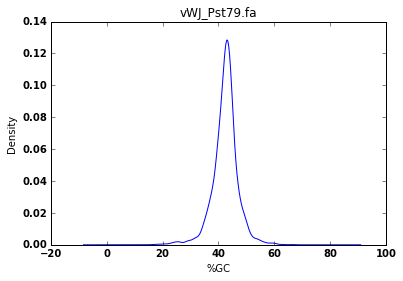

In [82]:
contig_df['%GC'].plot('kde')
plt.xlabel('%GC')
plt.title(file_name)

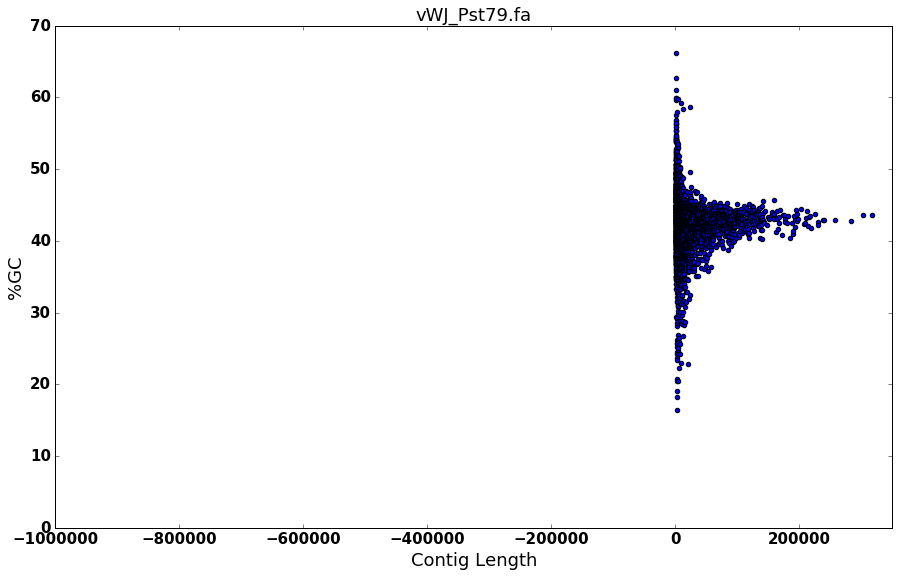

In [83]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 15}
matplotlib.rc('font', **font) #changes font of the plot
label_config_x = {'fontsize'            : 'large',
      'verticalalignment'   : 'top',
      'horizontalalignment' : 'center'
      }
label_config_y = {'fontsize'            : 'large',
      'verticalalignment'   : 'bottom',
      'horizontalalignment' : 'center'
      }
plt.figure(figsize=(15,9))
plt.scatter(contig_df['Length'], contig_df['%GC'])
plt.xlim(-1000000)
plt.ylim(0)
plt.xlabel("Contig Length",**label_config_x)
plt.ylabel("%GC",**label_config_y)
plt.title(file_name)

/anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['normal'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


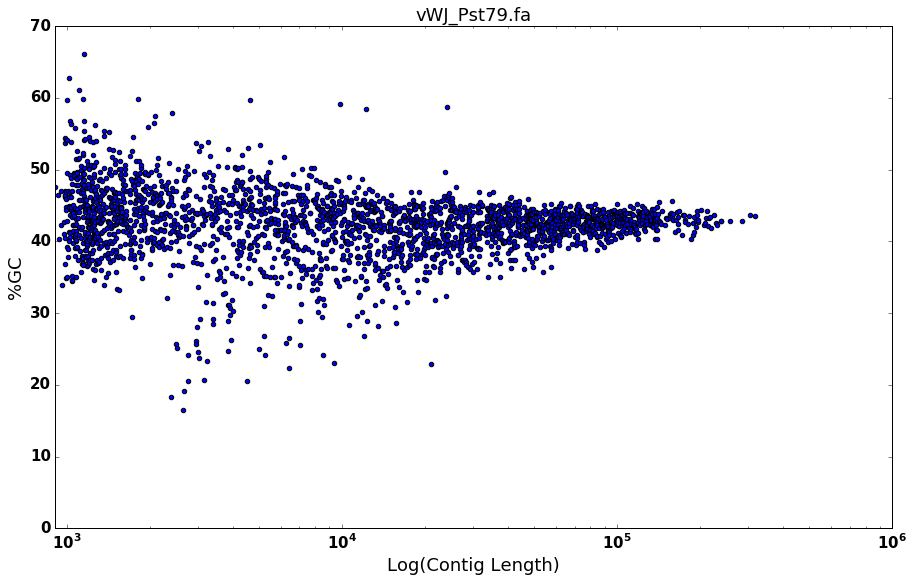

In [84]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 15}
matplotlib.rc('font', **font) #changes font of the plot
label_config_x = {'fontsize'            : 'large',
      'verticalalignment'   : 'top',
      'horizontalalignment' : 'center'
      }
label_config_y = {'fontsize'            : 'large',
      'verticalalignment'   : 'bottom',
      'horizontalalignment' : 'center'
      }
plt.figure(figsize=(15,9))
plt.scatter(contig_df['Length'], contig_df['%GC'])
plt.semilogx()
plt.xlim(-100)
plt.ylim(0)
plt.xlabel("Log(Contig Length)",**label_config_x)
plt.ylabel("%GC",**label_config_y)
plt.title(file_name)

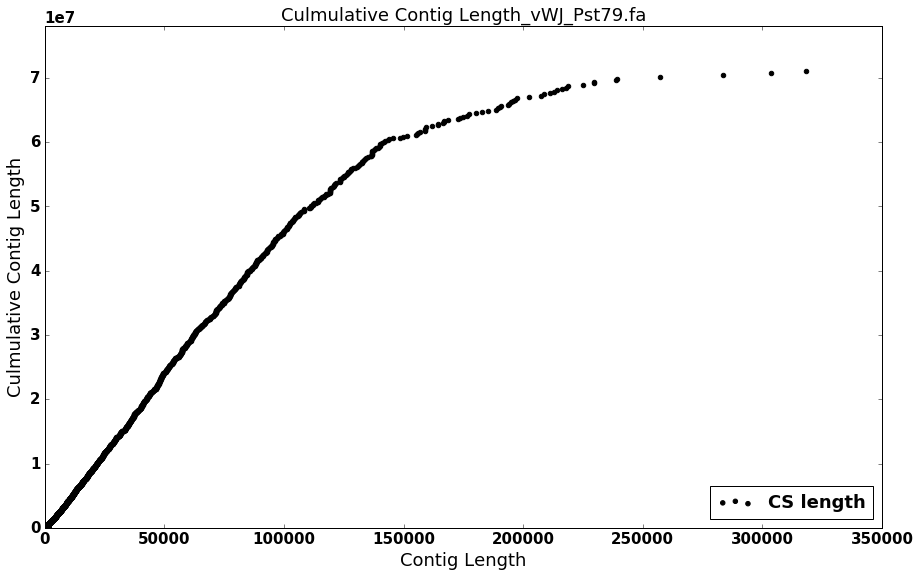

In [85]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 15}
matplotlib.rc('font', **font) #changes font of the plot
label_config_x = {'fontsize'            : 'large',
      'verticalalignment'   : 'top',
      'horizontalalignment' : 'center'
      }
label_config_y = {'fontsize'            : 'large',
      'verticalalignment'   : 'bottom',
      'horizontalalignment' : 'center'
      }
plt.figure(figsize=(15,9))
plt.scatter(contig_df['Length'], contig_df['CS_length'], c='k', label='CS length')
plt.xlim(-10, contig_df['Length'][len(contig_df['Length'])-1]*1.1)
plt.ylim(0, contig_df['CS_length'][len(contig_df['CS_length'])-1]*1.1)
plt.xlabel("Contig Length",**label_config_x)
#plt.semilogx('log')
plt.ylabel("Culmulative Contig Length",**label_config_y)
#plt.plot((cut_off_2000_2,cut_off_2000_2), plt.ylim(), 'g-', lw=1.5, label='2000bp length cut off') #horizonal line
#plt.plot((cut_off_5000_2,cut_off_5000_2), plt.ylim(), 'r-', lw=1.5, label='5000bp length cut off')
plt.legend(loc=4)
plt.title('Culmulative Contig Length_'+file_name)

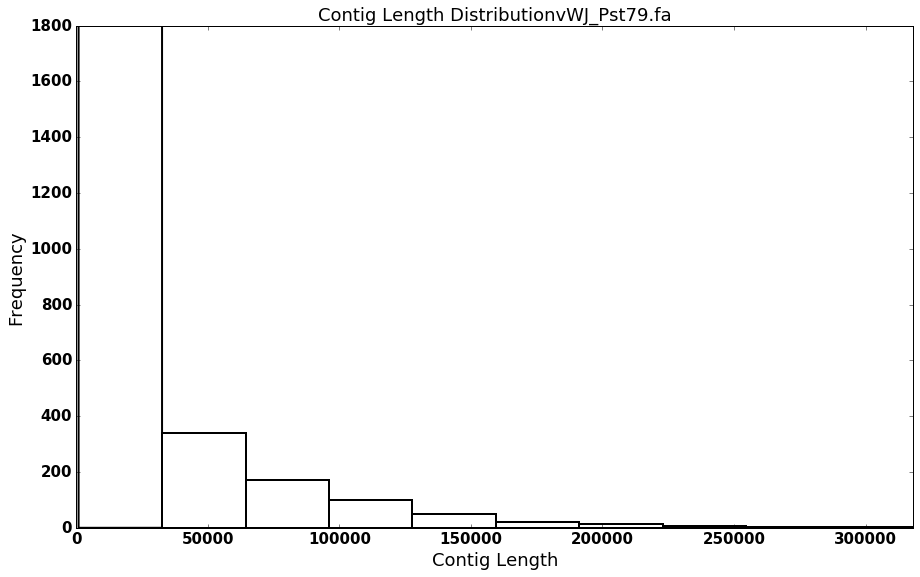

In [86]:
#histogram of 
label_config_x = {'fontsize'            : 'large',
      'verticalalignment'   : 'top',
      'horizontalalignment' : 'center'
      }
label_config_y = {'fontsize'            : 'large',
      'verticalalignment'   : 'bottom',
      'horizontalalignment' : 'center'
      }
plt.figure(figsize=(15,9))
contig_df['Length'].plot.hist(bins=10, color='w', edgecolor='k', linewidth = 2)
plt.xlim(0, contig_df['Length'][len(contig_df['Length'])-1])
plt.ylabel("Frequency",**label_config_y)
plt.xlabel("Contig Length",**label_config_x)
plt.title('Contig Length Distribution'+file_name)

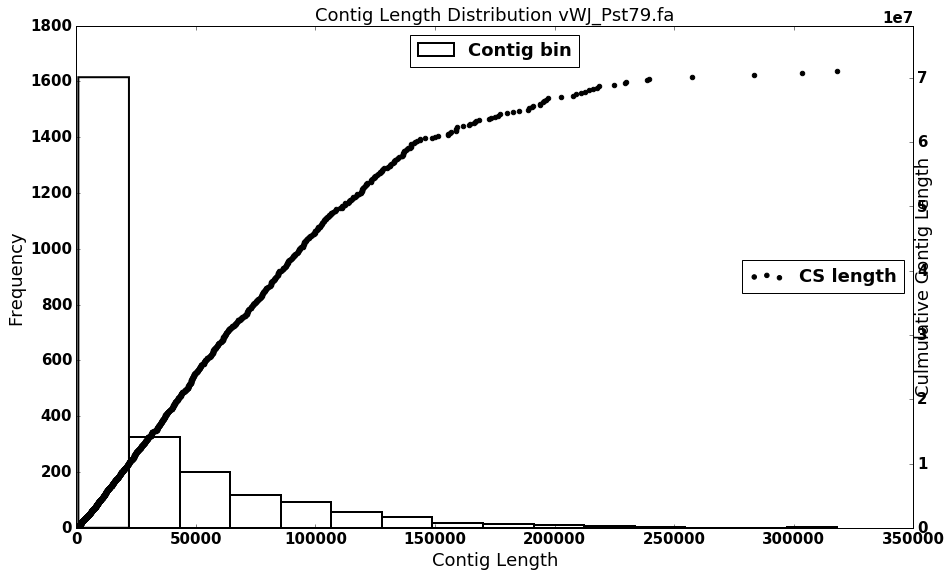

In [87]:
#histogram of 
label_config_x = {'fontsize'            : 'large',
      'verticalalignment'   : 'top',
      'horizontalalignment' : 'center'
      }
label_config_y = {'fontsize'            : 'large',
      'verticalalignment'   : 'bottom',
      'horizontalalignment' : 'center'
      }
fig, ax1 = plt.subplots(figsize=(15,9))
contig_df['Length'].plot.hist(bins=15, color='w', edgecolor='k', linewidth = 2, label = 'Contig bin')
plt.xlim(0, contig_df['Length'][len(contig_df['Length'])-1]*1.5)
plt.ylabel("Frequency",**label_config_y)
plt.xlabel("Contig Length",**label_config_x)
plt.title('Contig Length Distribution '+file_name)
plt.legend(loc=9)

#second plot

ax2 = ax1.twinx()
plt.scatter(contig_df['Length'], contig_df['CS_length'], c='k', label='CS length')
plt.ylim(0, contig_df['CS_length'][len(contig_df['CS_length'])-1]*1.1)
plt.xlim(0, contig_df['Length'][len(contig_df['Length'])-1]*1.1)
plt.xlabel("Contig Length",**label_config_x)
#plt.semilogx('log')
plt.ylabel("Culmulative Contig Length",**label_config_y)

plt.legend(loc=5)

In [88]:
#function to plot hist_of readlength distribution and CS plot
def hist_CS_plot(x, file_name='N/A', x_max = False):
    #the input data frame needs to be reset to sort by values, index reset, and new CS calculated
    y = x.sort_values(by='Length')
    y = y.reset_index(drop=True)
    y['CS_length'] = y['Length'].cumsum()
    #histogram of 
    label_config_x = {'fontsize'            : 'large',
          'verticalalignment'   : 'top',
          'horizontalalignment' : 'center'
          }
    label_config_y = {'fontsize'            : 'large',
          'verticalalignment'   : 'bottom',
          'horizontalalignment' : 'center'
          }
    fig, ax1 = plt.subplots(figsize=(15,9))
    x['Length'].plot.hist(bins=15, color='w', edgecolor='k', linewidth = 2, label = 'Contig bin')
    plt.xlim(0, y['Length'][len(y['Length'])-1]*1.5)
    plt.ylabel("Frequency",**label_config_y)
    plt.xlabel("Contig Length",**label_config_x)
    plt.title('Contig Length Distribution '+file_name)
    plt.legend(loc=9)

    #second plot

    ax2 = ax1.twinx()
    plt.scatter(y['Length'], y['CS_length'], c='k', label='CS length')
    plt.ylim(0, y['CS_length'][len(y['CS_length'])-1]*1.1)
    if x_max >  y['Length'][len(y['Length'])-1]*1.1:
        plt.xlim(0, x_max)
    else:
        plt.xlim(0, y['Length'][len(y['Length'])-1]*1.1)
    plt.xlabel("Contig Length",**label_config_x)
    #plt.semilogx('log')
    plt.ylabel("Culmulative Contig Length",**label_config_y)

    plt.legend(loc=5)
    return fig

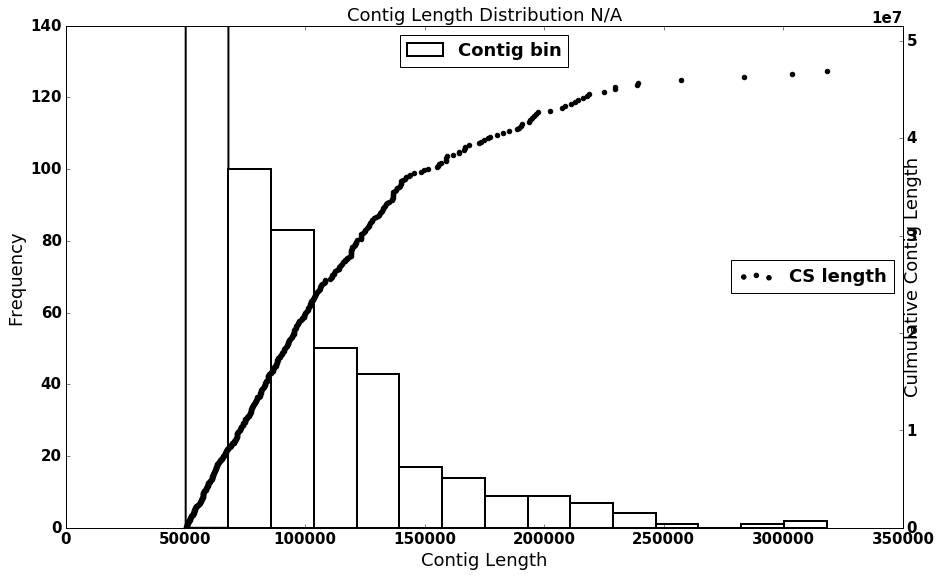

In [89]:
figure = hist_CS_plot(contig_df[contig_df['Length'] > 50000])

In [90]:
def GC_linear(x, file_name='N/A', x_max = False):
    y = x.sort_values(by='Length')
    y = y.reset_index(drop=True)
    y['CS_length'] = y['Length'].cumsum()
    font = {'family' : 'normal',
            'weight' : 'bold',
            'size'   : 15}
    matplotlib.rc('font', **font) #changes font of the plot
    label_config_x = {'fontsize'            : 'large',
          'verticalalignment'   : 'top',
          'horizontalalignment' : 'center'
          }
    label_config_y = {'fontsize'            : 'large',
          'verticalalignment'   : 'bottom',
          'horizontalalignment' : 'center'
          }
    figure = plt.figure(figsize=(15,9))
    plt.scatter(y['Length'], y['%GC'])
    if x_max > y['Length'][len(y['Length'])-1]*1.1:
        plt.xlim(-y['Length'].max()/4, x_max)
    else:
        plt.xlim(-y['Length'].max()/4)
    plt.ylim(20, 70)
    plt.xlabel("Contig Length",**label_config_x)
    plt.ylabel("%GC",**label_config_y)
    plt.title('GC_linear '+file_name)
    return figure

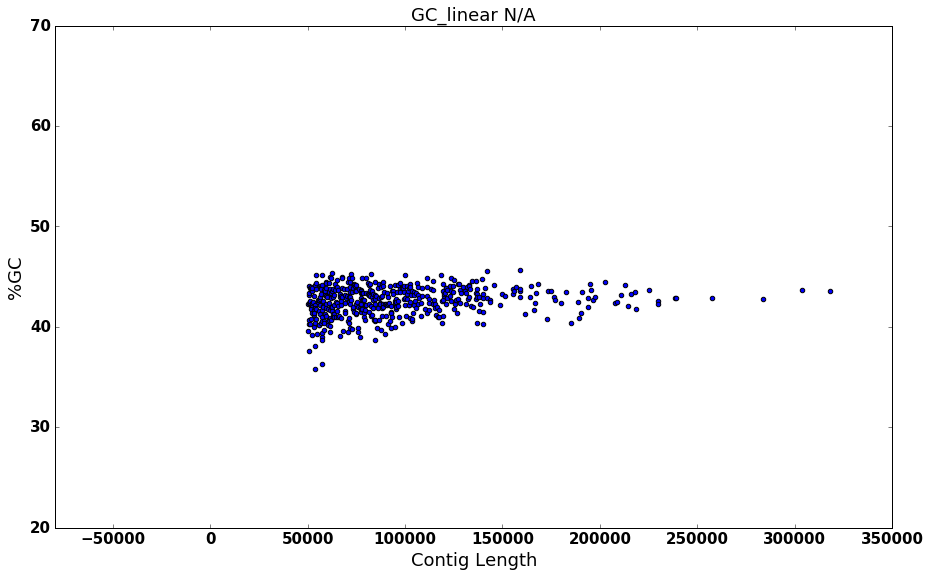

In [91]:
figure2 = GC_linear(contig_df[contig_df['Length'] > 50000])

In [92]:
def GC_log(x, file_name='N/A',x_max=False):
    y = x.sort_values(by='Length')
    y = y.reset_index(drop=True)
    y['CS_length'] = y['Length'].cumsum()
    font = {'family' : 'normal',
            'weight' : 'bold',
            'size'   : 15}
    matplotlib.rc('font', **font) #changes font of the plot
    label_config_x = {'fontsize'            : 'large',
          'verticalalignment'   : 'top',
          'horizontalalignment' : 'center'
          }
    label_config_y = {'fontsize'            : 'large',
          'verticalalignment'   : 'bottom',
          'horizontalalignment' : 'center'
          }
    figure  = plt.figure(figsize=(15,9))
    plt.scatter(y['Length'], y['%GC'])
    #plt.xlim(-y['Length'].max()/4)
    plt.ylim(20, 70)
    #plt.xlim(0)
    plt.semilogx()
    #if x_max >  y['Length'][len(y['Length'])-1]*1.1:
    #    plt.xlim(-100, x_max)
    #else:
     #   plt.xlim(-100, y['Length'][len(y['Length'])-1]*1.1)
    plt.xlabel("Contig Length",**label_config_x)
    plt.ylabel("%GC",**label_config_y)
    plt.title('GC_log_'+file_name)
    return figure

/anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['normal'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


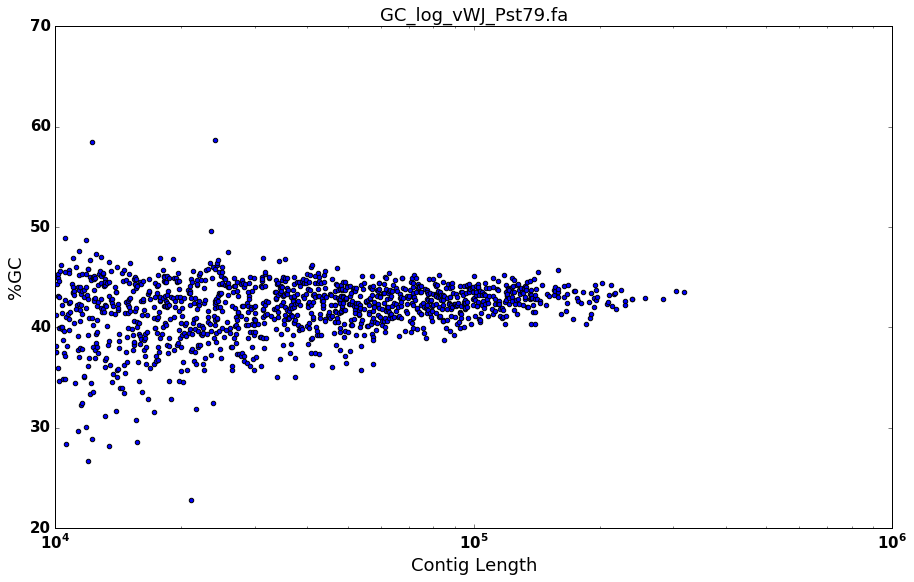

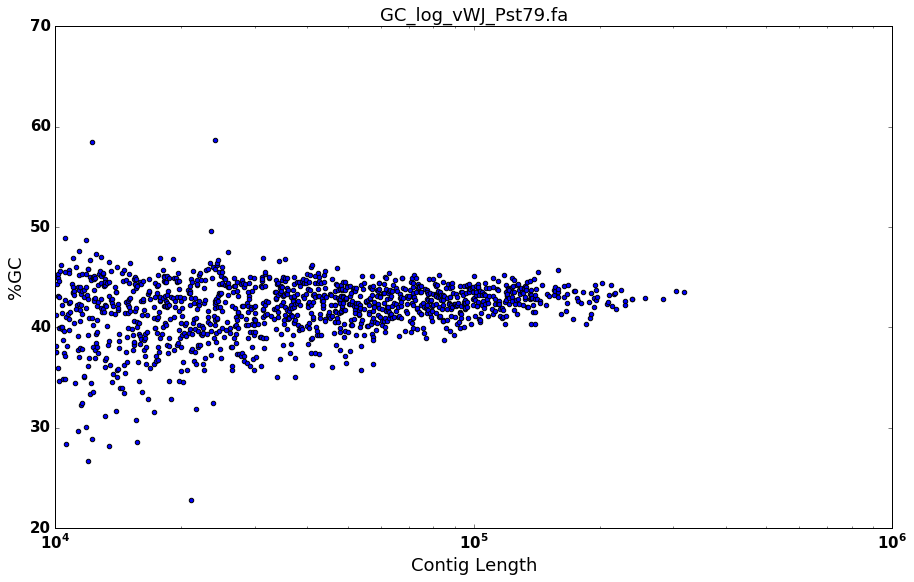

In [93]:
GC_log(contig_df[contig_df['Length'] > 10000], file_name)

It would be interesting to look at the gene content et al. of the cloud at the bottom left.

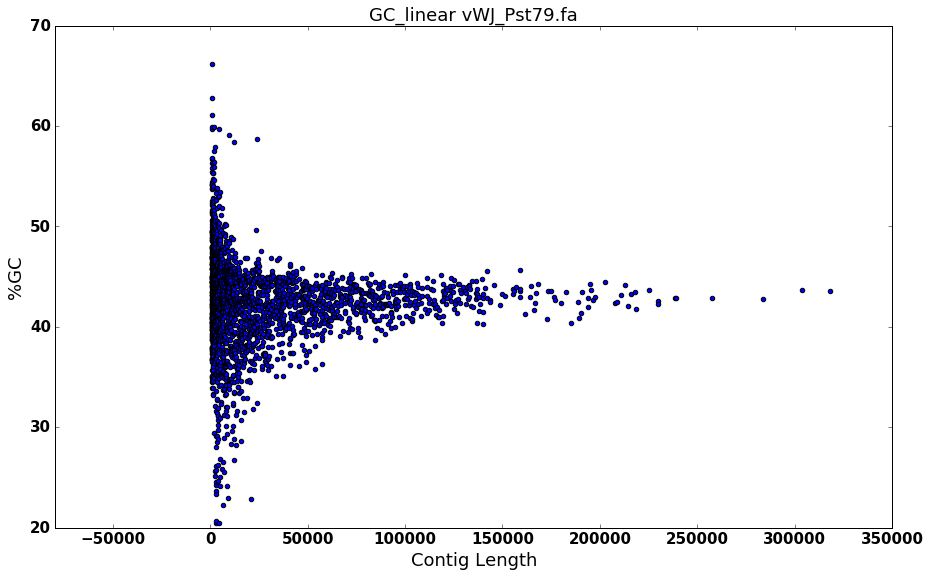

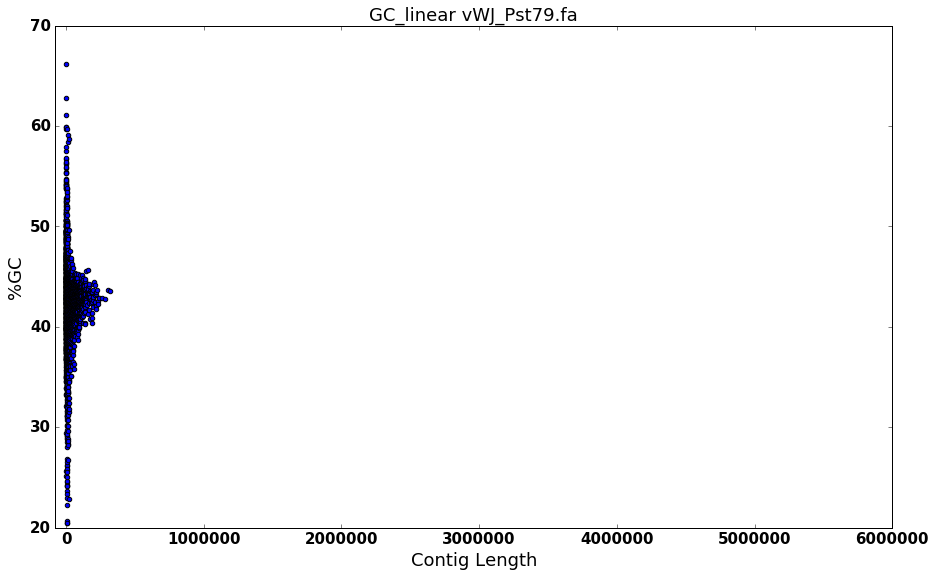

In [94]:
GC_linear_all = GC_linear(contig_df, file_name)
GC_linear_all.savefig(file_name+'GC_linear_all.png')
GC_linear(contig_df, file_name, x_max = 6000000).savefig((file_name+'GC_linear_600K.png'))

/anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['normal'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


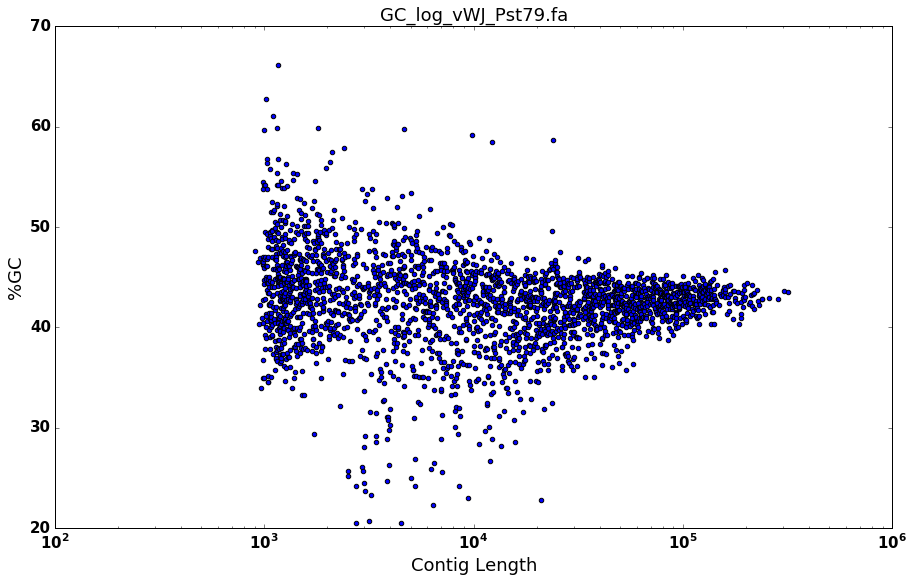

In [95]:
GC_log_all = GC_log(contig_df, file_name)
GC_log_all.savefig(file_name+'GC_log_all.png')
#GC_log(contig_df, file_name, x_max=10000000).savefig(file_name+'GC_log_1000K.png')

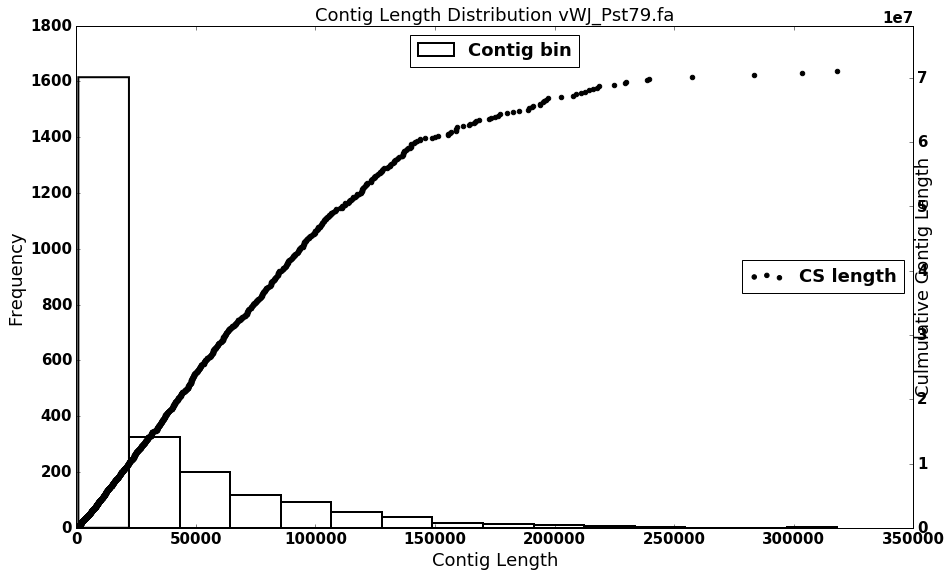

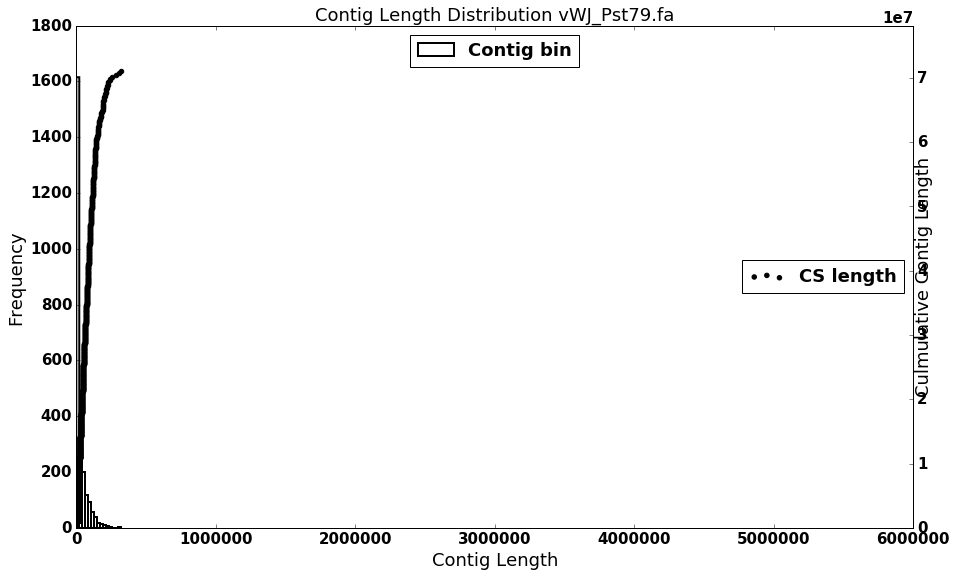

In [96]:
hist_CS_all = hist_CS_plot(contig_df, file_name)
hist_CS_all.savefig(file_name+'Hist_CS_all.png')
hist_CS_plot(contig_df, file_name, x_max=6000000).savefig(file_name+'Hist_CS_600K.png')

In [97]:
estimated_genome_size = int(90000000)

In [98]:
NG_range = list(range(0,estimated_genome_size, int(estimated_genome_size/int(100))))


In [99]:
Scaffold_NG_length = []

In [100]:
for x in NG_range:
    #print(contig_df['Length'][contig_df['CS_length']>x].min())
    Scaffold_NG_length.append(contig_df['Length'][contig_df['CS_length_reverse']>x].max())

In [101]:
#np.nan_to_num(Scaffold_NG_length)

/anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['normal'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


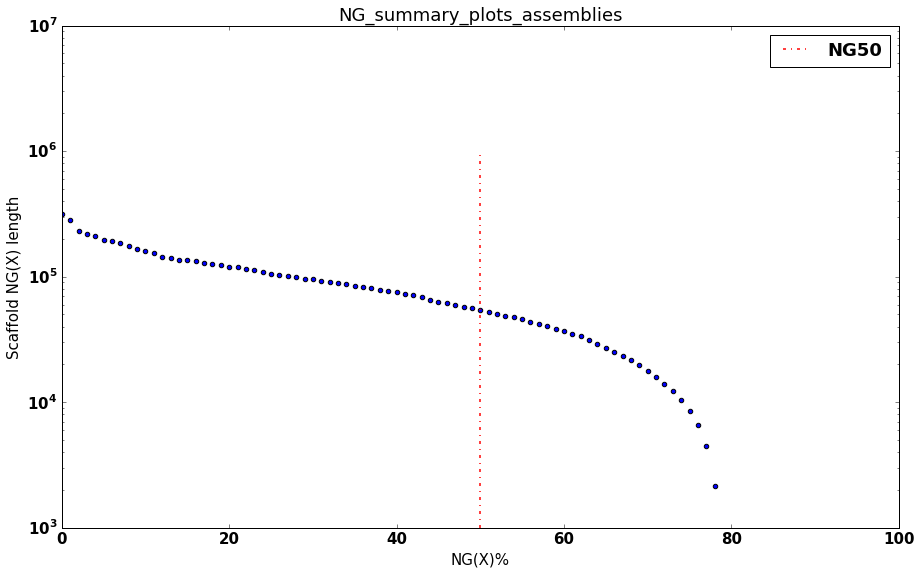

In [102]:
font = {'family' : 'normal',
            'weight' : 'bold',
            'size'   : 15}
matplotlib.rc('font', **font) #changes font of the plot
label_config_x = {'fontsize'            : 'large',
          'verticalalignment'   : 'top',
          'horizontalalignment' : 'center'
          }
label_config_y = {'fontsize'            : 'large',
          'verticalalignment'   : 'bottom',
          'horizontalalignment' : 'center'
          }
figure  = plt.figure(figsize=(15,9))
plt.xlim(0, 100)
plt.scatter(range(0,100,1), Scaffold_NG_length)
plt.semilogy()
plt.title('NG_summary_plots_assemblies')
plt.ylabel('Scaffold NG(X) length')
plt.xlabel('NG(X)%')
plt.plot((50, 50), plt.ylim(), 'r-.',  lw=1.5, label='NG50')
plt.legend(loc=1)